Bootstrap (valid draws):   0%|          | 0/100 [00:00<?, ?draw/s]

/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/broad_line_fit.py:3454: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


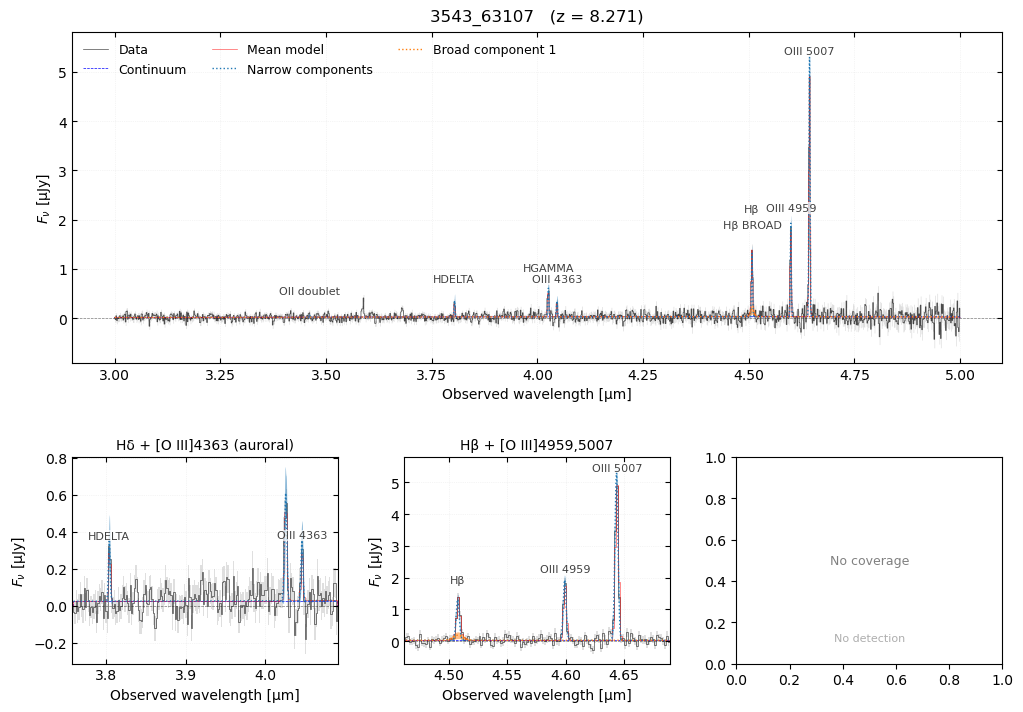


=== MODEL SELECTION (BIC Scores) ===

H-beta:
  Narrow only                      : BIC = 386.99
  Narrow + medium broad            : BIC = 271.85
  Narrow + medium + very broad     : BIC = 291.96
  Narrow + very broad only         : BIC = 272.39
  → Selected: Hβ: narrow + medium broad

H-delta:
  Narrow only                      : BIC = 390.61
  → Selected: Hδ: narrow only


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-----------------------------------------------------------------------------------------------------------------------------
OII_doublet      6.386e-20 ± 4.889e-20     7.77 ± 15.05  26.08 ± 15.34   34594.1 ± 37.8 0.81 ± 0.56      1.32 ± 0.59        0.37 ± 0.75
HDELTA          1.867e-19 ± 4.650e-20    37.66 ± 11.12    9.32 ± 1.93    38040.9 ± 6.0 3.69 ± 0.83      3.12 ± 0.64        4.01 ± 1.16
HGAMMA          3.967e-19 ± 6.992e-20    83.37 ±

In [2]:
from astropy.io import fits
import numpy as np
# NOTE: keep the same import path you used before
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad

# ---------- Load + crop ----------
specfile = "../../data/excels-uds04-v4_g395m-f290lp_3543_63107.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 3.0) & (lam <= 5.0)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 8.271


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=100,
    lyman_cut=None,
    deg=2,
    plot_continuum_subtracted = False,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,  
    save_path=None,
    lines_to_use=None,
    broad_mode="auto",
    verbose=False

)

print_bootstrap_line_table_broad(boot)


Fit with lines=['NII_6549', 'H⍺', 'NII_6585']: χ²=365.63, k=9, BIC=410.11
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD']: χ²=191.55, k=12, BIC=250.85
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD', 'H⍺_BROAD2']: χ²=124.32, k=15, BIC=198.44
Fit with lines=['NII_6549', 'H⍺', 'NII_6585', 'H⍺_BROAD2']: χ²=206.07, k=12, BIC=265.37
Local Hα+[N II] BIC (Hα window only):
  narrow-only      : BIC = 410.11
  +BROAD only      : BIC = 250.85
  +BROAD2 only     : BIC = 265.37
  +both BROAD      : BIC = 198.44
  → Selected model: narrow + BROAD + BROAD2
Fit with lines=['HBETA', 'OIII_4959', 'OIII_5007']: χ²=482.90, k=9, BIC=529.89
Fit with lines=['HBETA', 'OIII_4959', 'OIII_5007', 'HBETA_BROAD']: χ²=3425.69, k=12, BIC=3488.33
Fit with lines=['HBETA', 'OIII_4959', 'OIII_5007', 'HBETA_BROAD', 'HBETA_BROAD2']: χ²=1002.91, k=15, BIC=1081.22
Fit with lines=['HBETA', 'OIII_4959', 'OIII_5007', 'HBETA_BROAD2']: χ²=3497.83, k=12, BIC=3560.47
Local Hβ+[O III] BIC (Hβ window only):
  narro

Bootstrap (valid draws):   0%|          | 0/200 [00:00<?, ?draw/s]


FLUX DIAGNOSTIC: Hα Region

Component fluxes in Hα region (4.5472 - 4.7855 µm):
  NII_6549       : 2.922e-19 erg/s/cm²
  H⍺             : 3.161e-17 erg/s/cm²
  NII_6585       : 9.035e-19 erg/s/cm²
  H⍺_BROAD       : 1.006e-17 erg/s/cm²
  H⍺_BROAD2      : 9.115e-18 erg/s/cm²

Total (sum of components)     : 5.198e-17 erg/s/cm²
Total (integrated model)      : 5.229e-17 erg/s/cm²
Ratio (components/model)      : 0.9941
Discrepancy                   : -0.59%



/Users/raunaqrai/miniforge3/envs/jwst/lib/python3.12/site-packages/PyRSR/broad_line_fit.py:3450: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


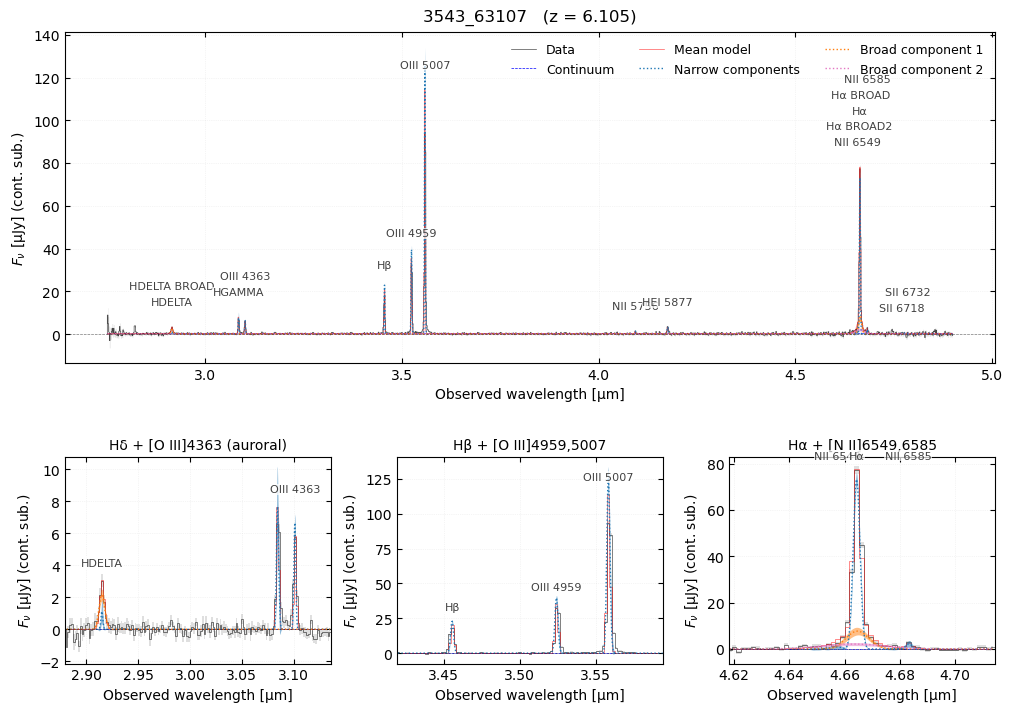


=== MODEL SELECTION (BIC Scores) ===

H-alpha:
  Narrow only                      : BIC = 410.11
  Narrow + medium broad            : BIC = 250.85
  Narrow + medium + very broad     : BIC = 198.44
  Narrow + very broad only         : BIC = 265.37
  → Selected: Hα: narrow + medium + very broad

H-beta:
  Narrow only                      : BIC = 529.89
  Narrow + medium broad            : BIC = 3488.33
  Narrow + medium + very broad     : BIC = 1081.22
  Narrow + very broad only         : BIC = 3560.47
  → Selected: Hβ: narrow only

H-delta:
  Narrow only                      : BIC = 678.73
  Narrow + medium broad            : BIC = 638.40
  Narrow + very broad only         : BIC = 670.70
  → Selected: Hδ: narrow + medium broad


=== BOOTSTRAP SUMMARY (value ± error) ===
Line               F_line [erg/s/cm²]          EW₀ [Å]        σ_A [Å]        μ_obs [Å]    SNR_int   SNR_peak(data)    SNR_peak(model)
-------------------------------------------------------------------------------------

In [2]:
from astropy.io import fits
import numpy as np
from PyRSR.broad_line_fit import broad_fit, print_bootstrap_line_table_broad



# ---------- Load + crop ----------
specfile = "../../data/stark-rxcj2248-v4_g395m-f290lp_2478_3.spec.fits"
with fits.open(specfile) as hdul:
    t = hdul["SPEC1D"].data
    lam = np.asarray(t["wave"])
    fnu = np.asarray(t["flux"])
    enu = np.asarray(t["err"])

target_msaid = "3543_63107"

mask = (lam >= 2.75) & (lam <= 5)
spec = dict(lam=lam[mask], flux=fnu[mask], err=enu[mask])

z = 6.1052


boot = broad_fit(
    source=spec,    
    z=z,
    grating="G395M",
    source_id=target_msaid,
    n_boot=200,
    lyman_cut=None,
    deg=2,
    random_state=21,
    continuum_windows=None,
    plot=True,           
    show_progress=True,   
    save_path=None,
    lines_to_use=None,
    plot_continuum_subtracted = True,
    broad_mode="auto",
    verbose=True,
    plot_unit='fnu',
)

print_bootstrap_line_table_broad(boot)